In [128]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [24]:
# Define a working directory
os.chdir('/Users/relic/Documents/mirror-data')

In [120]:
# Import the dataset
df = pd.read_csv('gray_tracking_deidentified.csv', skiprows=2)
#df = df[1:] #take the data less the header row
new_header = ['Date', 'DayOfWeek', 'PositiveRetro', 'NegativeRetro', 'DailyGoals', 'Journal', 
              'Alcohol', 'WhyDrink', 'BreakfastHealth', 'WalkRunDistance', 'LunchHealth', 'RoomClean', 
              'HoursSocial', 'HoursArt', 'DinnerHealth', 'SleepTime', 'WakeTime', 'HoursSleep', 
              'WhereSleep', 'PartnerContact',  'MinutesMusic', 'MorningQuality', 'FocusLevel', 
              'AnxietyLevel', 'HealthLevel', 'Motivationlevel', 'HappyLevel', 'Evening', 'Drugs', 
              'Weight', 'HoursTVGames', 'FinishBook', 'Illness', 'WorkStartTime', 'WorkEndTime', 
              'SecondCoffeeTime', 'CovidPoints', 'CovidPointsActivity']
df.columns = new_header
df = df.drop(['PositiveRetro', 'NegativeRetro', 'DailyGoals', 'Journal', 'WhyDrink', 'Evening', 'CovidPointsActivity'], axis=1)

pd.set_option('display.max_columns', None)

# Fill the NaNs in some of the numeric columns with 0
numeric_columns = ['Alcohol', 'WalkRunDistance', 'Illness']
for column in numeric_columns:
    df[column] = df[column].fillna(0)

In [121]:
df.head(10)

,Date,DayOfWeek,Alcohol,BreakfastHealth,WalkRunDistance,LunchHealth,RoomClean,HoursSocial,HoursArt,DinnerHealth,SleepTime,WakeTime,HoursSleep,WhereSleep,PartnerContact,MinutesMusic,MorningQuality,FocusLevel,AnxietyLevel,HealthLevel,Motivationlevel,HappyLevel,Drugs,Weight,HoursTVGames,FinishBook,Illness,WorkStartTime,WorkEndTime,SecondCoffeeTime,CovidPoints
0,10/16/18,Tuesday,4.0,6.0,3.4,4.0,7.0,4.0,0.0,2.0,3:06,8:24,8:30:00,Home,0.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN
1,10/17/18,Wednesday,3.0,5.0,0.0,7.0,6.0,6.0,0.0,5.0,0:40,4:54,8:00:00,Home,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN
2,10/18/18,Thursday,5.0,5.0,0.0,6.0,6.0,2.0,0.0,2.0,4:00,7:20,8:00:00,Home,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN
3,10/19/18,Friday,4.0,7.0,0.0,6.0,8.0,6.0,0.0,8.0,0:40,2:00,6:00:00,Home,0.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN
4,10/20/18,Saturday,0.0,6.0,0.0,7.0,8.0,6.0,0.0,7.0,1:00,7:02,7:42:00,Traveling,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN
5,10/21/18,Sunday,1.0,8.0,0.0,0.0,7.0,2.0,0.0,7.0,0:30,4:30,5:30:00,Home,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN
6,10/22/18,Monday,1.0,0.0,0.0,7.0,4.0,4.0,2.0,8.0,5:00,7:00,7:30:00,Home,0.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN
7,10/23/18,Tuesday,2.0,0.0,0.0,2.0,4.0,3.0,0.5,4.0,3:00,1:00,6:00:00,Home,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN
8,10/24/18,Wednesday,3.0,3.0,0.0,0.0,4.0,6.0,0.0,5.0,0:00,3:00,6:00:00,Home,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN
9,10/25/18,Thursday,0.0,0.0,0.0,0.0,7.0,3.0,1.0,4.0,2:40,7:00,7:00:00,Home,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              921 non-null    object 
 1   DayOfWeek         921 non-null    object 
 2   Alcohol           921 non-null    float64
 3   BreakfastHealth   844 non-null    float64
 4   WalkRunDistance   921 non-null    float64
 5   LunchHealth       809 non-null    float64
 6   RoomClean         838 non-null    float64
 7   HoursSocial       773 non-null    float64
 8   HoursArt          812 non-null    float64
 9   DinnerHealth      810 non-null    float64
 10  SleepTime         776 non-null    object 
 11  WakeTime          778 non-null    object 
 12  HoursSleep        862 non-null    object 
 13  WhereSleep        866 non-null    object 
 14  PartnerContact    865 non-null    float64
 15  MinutesMusic      811 non-null    float64
 16  MorningQuality    505 non-null    float64
 1

In [126]:
df.describe()

,Alcohol,BreakfastHealth,WalkRunDistance,LunchHealth,RoomClean,HoursSocial,HoursArt,DinnerHealth,PartnerContact,MinutesMusic,MorningQuality,FocusLevel,AnxietyLevel,HealthLevel,Motivationlevel,HappyLevel,Drugs,HoursTVGames,Illness
count,921.000000,844.000000,921.000000,809.000000,838.000000,773.000000,812.000000,810.000000,865.000000,811.000000,505.000000,744.000000,742.000000,543.000000,547.000000,743.000000,861.000000,728.000000,921.000000
mean,1.513029,6.234597,0.954908,5.384425,6.451074,7.583765,1.087451,5.602469,0.268208,31.288533,5.984158,5.763441,5.134771,5.257827,5.751371,6.095559,0.040650,1.293407,0.331162
std,1.449829,2.866245,1.779446,2.211425,1.745961,3.744277,1.916432,2.207414,0.492743,66.177170,1.955798,1.795900,1.698027,1.184077,1.841815,1.503014,0.225103,1.063870,0.940626
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,0.000000,4.000000,6.000000,5.000000,0.000000,4.000000,0.000000,0.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,0.000000,0.500000,0.000000
50%,1.000000,7.000000,0.000000,5.000000,7.000000,8.000000,0.275000,6.000000,0.000000,15.000000,6.000000,6.000000,5.000000,5.000000,6.000000,6.000000,0.000000,1.000000,0.000000
75%,2.000000,9.000000,1.400000,7.000000,8.000000,12.000000,1.500000,7.000000,0.000000,30.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,0.000000,2.000000,0.000000
max,6.000000,10.000000,13.100000,10.000000,9.000000,12.000000,12.000000,10.000000,2.000000,400.000000,10.000000,10.000000,10.000000,8.000000,10.000000,10.000000,2.000000,6.000000,7.000000


In [127]:
df.columns

Index(['Date', 'DayOfWeek', 'Alcohol', 'BreakfastHealth', 'WalkRunDistance',
       'LunchHealth', 'RoomClean', 'HoursSocial', 'HoursArt', 'DinnerHealth',
       'SleepTime', 'WakeTime', 'HoursSleep', 'WhereSleep', 'PartnerContact',
       'MinutesMusic', 'MorningQuality', 'FocusLevel', 'AnxietyLevel',
       'HealthLevel', 'Motivationlevel', 'HappyLevel', 'Drugs', 'Weight',
       'HoursTVGames', 'FinishBook', 'Illness', 'WorkStartTime', 'WorkEndTime',
       'SecondCoffeeTime', 'CovidPoints'],
      dtype='object')

In [145]:
df_sort = df.sort_values(by = 'WalkRunDistance',  ascending=False)
df_sort.head(10)

,Date,DayOfWeek,Alcohol,BreakfastHealth,WalkRunDistance,LunchHealth,RoomClean,HoursSocial,HoursArt,DinnerHealth,SleepTime,WakeTime,HoursSleep,WhereSleep,PartnerContact,MinutesMusic,MorningQuality,FocusLevel,AnxietyLevel,HealthLevel,Motivationlevel,HappyLevel,Drugs,Weight,HoursTVGames,FinishBook,Illness,WorkStartTime,WorkEndTime,SecondCoffeeTime,CovidPoints
740,10/25/20,Sunday,2.0,5.0,13.1,7.0,6.0,12.00,0.0,8.0,2:00,9:30,7:30,Traveling,0.0,20.0,7.0,4.0,4.0,5.0,4.0,6.0,0.0,NaN,2.00,NaN,0.0,NaN,NaN,NaN,0
704,9/19/20,Saturday,2.0,9.0,12.7,9.0,4.0,0.00,2.0,7.0,21:30,7:24,10:24,Traveling,0.0,0.0,9.0,8.0,2.0,8.0,9.0,8.0,0.0,NaN,1.00,NaN,0.0,NaN,NaN,0,0
724,10/9/20,Friday,2.0,8.0,10.5,8.0,6.0,0.25,0.0,6.0,21:30,8:30,9:00,Traveling,0.0,20.0,10.0,7.0,2.0,7.0,8.0,5.0,0.0,NaN,0.50,NaN,0.0,NaN,NaN,0,?
758,11/12/20,Thursday,3.0,9.0,10.4,6.0,6.0,1.00,0.0,5.0,1:30,6:47,8:47,Traveling,0.0,0.0,5.0,8.0,6.0,7.0,8.0,7.0,0.0,NaN,1.00,NaN,0.0,NaN,NaN,0,210
723,10/8/20,Thursday,1.0,8.0,9.4,8.0,6.0,0.00,0.0,3.0,23:30,8:46,10:06,Traveling,0.0,20.0,10.0,6.0,3.0,6.0,7.0,4.0,0.0,NaN,0.25,"Felllowship of the Ring, JRR Tolkein",0.0,NaN,NaN,0,0
835,1/28/21,Thursday,4.0,4.0,8.9,8.0,8.0,2.00,0.0,3.0,4:30,8:20,8:35,Traveling,0.0,15.0,6.0,2.0,3.0,7.0,6.0,7.0,0.0,NaN,5.00,NaN,0.0,NaN,NaN,0,0
762,11/16/20,Monday,0.0,8.0,8.5,6.0,6.0,0.50,0.0,2.0,0:00,6:30,10:16,Traveling,0.0,30.0,10.0,5.0,4.0,6.0,5.0,7.0,0.0,NaN,0.00,NaN,0.0,NaN,NaN,0,0
564,5/2/20,Saturday,2.0,8.0,8.5,0.0,7.0,8.00,0.0,9.0,3:30,10:20,8:20,Home,0.0,30.0,4.0,6.0,7.0,6.0,4.0,NaN,0.0,NaN,2.00,NaN,0.0,NaN,NaN,21:00,NaN
721,10/6/20,Tuesday,2.0,8.0,7.5,7.0,6.0,1.00,1.0,3.0,0:00,9:30,8:30,Traveling,0.0,20.0,8.0,8.0,4.0,5.0,8.0,8.0,0.0,NaN,0.00,NaN,0.0,NaN,NaN,0,20
764,11/18/20,Wednesday,0.0,5.0,7.4,6.0,6.0,0.00,0.0,4.0,22:00,7:30,9:30,Traveling,0.0,30.0,10.0,7.0,2.0,7.0,6.0,8.0,0.0,NaN,0.50,NaN,0.0,NaN,NaN,0,0


(array([683.,  87.,  83.,  38.,  16.,   6.,   3.,   2.,   1.,   2.]),
 array([ 0.  ,  1.31,  2.62,  3.93,  5.24,  6.55,  7.86,  9.17, 10.48,
        11.79, 13.1 ]),
 <BarContainer object of 10 artists>)

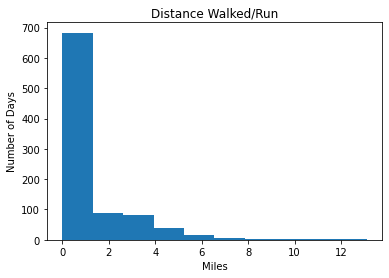

In [147]:
num_bins = 10
plt.title('Distance Walked/Run')
plt.xlabel('Miles')
plt.ylabel('Number of Days')
plt.hist(df['WalkRunDistance'], num_bins)

Text(0, 0.5, '# of Drinks')

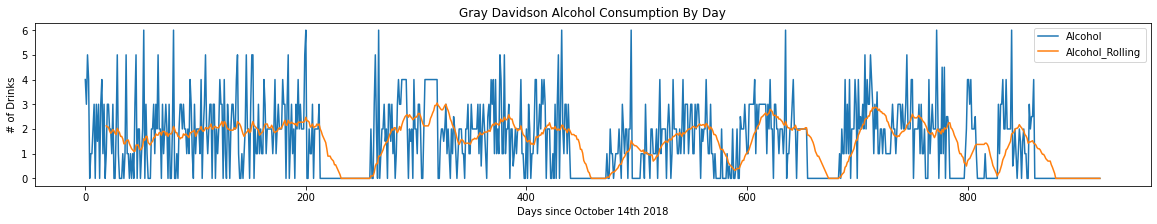

In [108]:
df['Alcohol_Rolling'] = df.iloc[:,6].rolling(window=20).mean()

drink_plot = df.plot(y=['Alcohol', 'Alcohol_Rolling'],  use_index=True, figsize=(20,3), title='Gray Davidson Alcohol Consumption By Day');

drink_plot.set_xlabel("Days since October 14th 2018")
drink_plot.set_ylabel("# of Drinks")

Text(0, 0.5, 'Distance (Miles)')

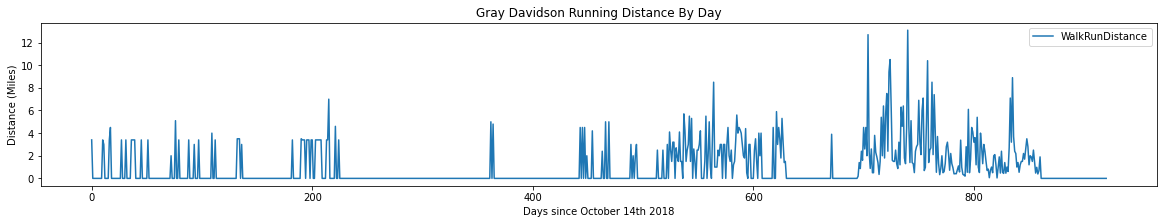

In [130]:
run_plot = df.plot(y='WalkRunDistance',  use_index=True, figsize=(20,3), title='Gray Davidson Running Distance By Day');

run_plot.set_xlabel("Days since October 14th 2018")
run_plot.set_ylabel("Distance (Miles)")

Text(0, 0.5, 'Illness Self-Rating (0 thru 10)')

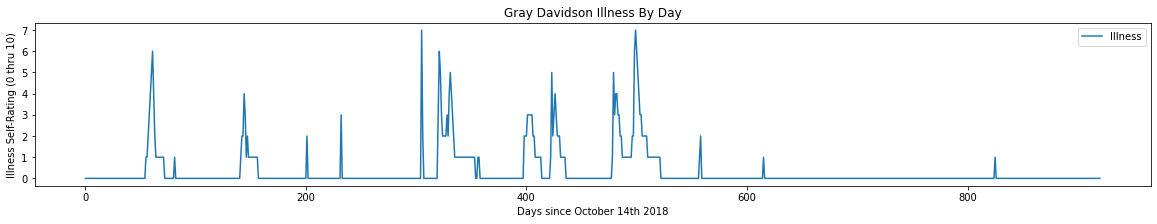

In [92]:
sick_plot = df.plot(y='Illness',  use_index=True, figsize=(20,3), title='Gray Davidson Illness By Day');

sick_plot.set_xlabel("Days since October 14th 2018")
sick_plot.set_ylabel("Illness Self-Rating (0 thru 10)")


In [129]:
three_plot = df.plot(y=['Alcohol_Rolling', 'Illness'],  use_index=True, figsize=(20,3), title='Gray Davidson Illness By Day');

three_plot.set_xlabel("Days since October 14th 2018")
three_plot.set_ylabel("Illness Self-Rating (0 thru 10)")

KeyError: "['Alcohol_Rolling'] not in index"